In [1]:
#Split and scale the data, train hyper parameters, Model, Evaluate

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
#from sklearn import cross_validation, metrics  
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import pandas as pd
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


%store -r df

print(df.info())
print(df.shape)
print(df.head())

   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 999
Data columns (total 16 columns):
search_word                  989 non-null object
contentDetails.caption       989 non-null bool
contentDetails.definition    989 non-null object
catID                        989 non-null int64
description                  975 non-null object
localized.description        974 non-null object
localized.title              989 non-null object
tags                         930 non-null object
title                        989 non-null object
commentCount                 989 non-null float64
dislikeCount                 989 non-null float64
likeCount                    989 non-null float64
viewCount                    989 non-null float64
view_bucket                  989 non-null float64
age_int                      989 non-null int64
target                       989 non-null int64
dtypes: bool(1), float64(5), int64(3), object(7)
memory usage: 124.6+ KB
None
(989, 16)
  search_word  contentD

In [2]:
#Scale all of the count data
from sklearn.preprocessing import label_binarize

minmax_scale = preprocessing.MinMaxScaler().fit(df[['commentCount','dislikeCount','likeCount']])

X = pd.DataFrame(minmax_scale.transform(df[['commentCount','dislikeCount','likeCount']]))
print(X.shape)
y = df['target']


n = pd.get_dummies(df[['search_word','contentDetails.definition','contentDetails.caption']])

# X = pd.concat([X, n], axis=1)
print(X.head())





(989, 3)
          0         1         2
0  0.000190  0.000486  0.000166
1  0.018638  0.000043  0.000012
2  0.018638  0.000316  0.000130
3  0.018638  0.001240  0.000682
4  0.000104  0.000140  0.000128


In [3]:
# add the dummy columns as variables
X = pd.DataFrame(np.hstack([X,n]))
X.shape



(989, 26)

In [4]:
# Normalize the time series data and store as new date column
ts = df['age_int']
scaled_ts = (ts-ts.min())/(ts.max()-ts.min())

X['Age'] = pd.Series(scaled_ts)
X['Age'].fillna((X['Age'].mean()), inplace=True)

print(X.shape)


(989, 27)


In [5]:
X.head()



,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,Age
0,0.000190146,0.000486296,0.000165565,False,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.083731
1,0.0186383,4.25509e-05,1.24485e-05,False,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.096052
2,0.0186383,0.000316092,0.000129998,False,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.484536
3,0.0186383,0.00124005,0.000681999,False,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.013075
4,0.000104011,0.00013981,0.000127686,False,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.002514


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.9, random_state=0)

X_train.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 304 to 684
Data columns (total 27 columns):
0      890 non-null object
1      890 non-null object
2      890 non-null object
3      890 non-null object
4      890 non-null object
5      890 non-null object
6      890 non-null object
7      890 non-null object
8      890 non-null object
9      890 non-null object
10     890 non-null object
11     890 non-null object
12     890 non-null object
13     890 non-null object
14     890 non-null object
15     890 non-null object
16     890 non-null object
17     890 non-null object
18     890 non-null object
19     890 non-null object
20     890 non-null object
21     890 non-null object
22     890 non-null object
23     890 non-null object
24     890 non-null object
25     890 non-null object
Age    890 non-null float64
dtypes: float64(1), object(26)
memory usage: 194.7+ KB


C:\Users\e620173\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [7]:


model = sm.OLS(list(y_train), X_train.astype(float)).fit()
y_pred = model.predict(X) 
# print(y_pred.head(10))
# print(y_test.head(10))
print(y_pred.head(10))
print(type(y_test.values))
#print(metrics.accuracy_score(y_test.values, y_pred.values))
print('Accuracy: ' + str(np.mean(y_pred.values == y_test.values)))
print_model = model.summary()
print(print_model)

0    0.0931204
1     0.118601
2     0.175921
3     0.108598
4       0.0807
5     0.104851
6     0.121276
7     0.084095
8    0.0948788
9     0.202743
dtype: object
<class 'numpy.ndarray'>
Accuracy: 0.0
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     13.12
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           2.80e-45
Time:                        07:43:38   Log-Likelihood:                -1550.3
No. Observations:                 890   AIC:                             3153.
Df Residuals:                     864   BIC:                             3277.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
        

C:\Users\e620173\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.


Accuracy of Lin Reg on test set: 0.07
Linear Regression R squared: 0.0676
Linear Regression RMSE: 1.5790
Linear Regression MAE: 1.2994
Accuracy of  train set: 0.0
Accuracy of test set: 0.0


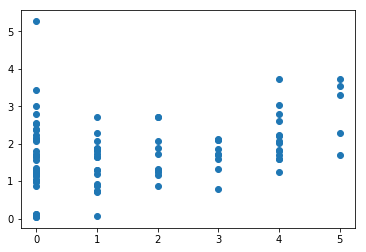

In [8]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
train_predicted = regressor.predict(X_train)


print('Accuracy of Lin Reg on test set: {:.2f}'.format(regressor.score(X_test, y_test)))
print('Linear Regression R squared: %.4f' % regressor.score(X_test, y_test))
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)
print('Accuracy of  train set: ' + str(np.mean(train_predicted == y_train)))
print('Accuracy of test set: ' + str(np.mean(y_pred == y_test)))
plt.scatter(y_test,y_pred)

In [9]:
print('Linear model is not a good fit for the data so move on to Log Reg.')

Linear model is not a good fit for the data so move on to Log Reg.


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# set up classification report target variables

from sklearn.metrics import classification_report

target_names = ['No Rank', 'White Belt', 'Blue Belt', 'Purple Belt', 'Brown Belt', 'Black Belt']



In [11]:
Logit = LogisticRegression()

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))
#print(metrics.classification_report(y_test,y_pred))
print('Logit R squared: %.4f' % clf.score(X_test, y_test))
logit_mse = mean_squared_error(y_pred, y_test)
logit_rmse = np.sqrt(logit_mse)
print('Logit RMSE: %.4f' % logit_rmse)
print(classification_report(y_test, y_pred, target_names=target_names))

0.4444444444444444
Logit R squared: 0.4444
Logit RMSE: 1.8477
              precision    recall  f1-score   support

     No Rank       0.53      0.79      0.64        39
  White Belt       0.57      0.36      0.44        22
   Blue Belt       0.17      0.30      0.21        10
 Purple Belt       0.00      0.00      0.00         9
  Brown Belt       0.00      0.00      0.00        14
  Black Belt       0.33      0.40      0.36         5

   micro avg       0.44      0.44      0.44        99
   macro avg       0.27      0.31      0.28        99
weighted avg       0.37      0.44      0.39        99



C:\Users\e620173\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\e620173\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\e620173\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
print('Logit relative poor performance without tuning. Next try some tuning')

Logit relative poor performance without tuning. Next try some tuning


In [13]:
c_space = np.logspace(1, 5, 10)
param_grid = {'C': c_space}

logreg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=200)
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train,y_train)
y_pred = logreg_cv.predict(X_test)
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Accuracy is {}".format(metrics.accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=target_names))

C:\Users\e620173\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\e620173\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\e620173\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\e620173\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\e620173\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\e620173\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\e620173\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\e620173\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\e620173\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\e620173\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

Tuned Logistic Regression Parameters: {'C': 215.44346900318823}
Accuracy is 0.41414141414141414
              precision    recall  f1-score   support

     No Rank       0.56      0.69      0.62        39
  White Belt       0.50      0.41      0.45        22
   Blue Belt       0.16      0.30      0.21        10
 Purple Belt       0.00      0.00      0.00         9
  Brown Belt       0.00      0.00      0.00        14
  Black Belt       0.25      0.40      0.31         5

   micro avg       0.41      0.41      0.41        99
   macro avg       0.25      0.30      0.26        99
weighted avg       0.36      0.41      0.38        99



C:\Users\e620173\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [14]:
print('Even with tuning Log Reg is not good.')

Even with tuning Log Reg is not good.


In [15]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline

nns = np.arange(1,20,1)

def train_and_predict(nn):
    knn = Pipeline([
                        ('knn', KNeighborsClassifier(n_neighbors=nn) )
                        ])
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=target_names))
    score = metrics.accuracy_score(y_test, y_pred)
    return score



for nn in nns:
    print('nn: ', nn)
    print('Score: ', train_and_predict(nn))
    print()

nn:  1
              precision    recall  f1-score   support

     No Rank       0.64      0.59      0.61        39
  White Belt       0.48      0.45      0.47        22
   Blue Belt       0.36      0.50      0.42        10
 Purple Belt       0.38      0.56      0.45         9
  Brown Belt       0.57      0.29      0.38        14
  Black Belt       0.38      0.60      0.46         5

   micro avg       0.51      0.51      0.51        99
   macro avg       0.47      0.50      0.47        99
weighted avg       0.53      0.51      0.51        99

Score:  0.5050505050505051

nn:  2
              precision    recall  f1-score   support

     No Rank       0.59      0.82      0.69        39
  White Belt       0.44      0.32      0.37        22
   Blue Belt       0.20      0.30      0.24        10
 Purple Belt       0.33      0.33      0.33         9
  Brown Belt       0.50      0.07      0.12        14
  Black Belt       0.67      0.40      0.50         5

   micro avg       0.48      0.48  


Score:  0.47474747474747475

nn:  16
              precision    recall  f1-score   support

     No Rank       0.59      0.85      0.69        39
  White Belt       0.41      0.41      0.41        22
   Blue Belt       0.07      0.10      0.08        10
 Purple Belt       0.00      0.00      0.00         9
  Brown Belt       0.00      0.00      0.00        14
  Black Belt       0.50      0.20      0.29         5

   micro avg       0.44      0.44      0.44        99
   macro avg       0.26      0.26      0.25        99
weighted avg       0.36      0.44      0.39        99

Score:  0.4444444444444444

nn:  17
              precision    recall  f1-score   support

     No Rank       0.56      0.87      0.68        39
  White Belt       0.50      0.36      0.42        22
   Blue Belt       0.12      0.20      0.15        10
 Purple Belt       0.00      0.00      0.00         9
  Brown Belt       0.00      0.00      0.00        14
  Black Belt       1.00      0.20      0.33         5

   

In [16]:
# Try SVM

from sklearn import svm

from sklearn.metrics import f1_score

clf = svm.SVC(gamma='scale', random_state=0)
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))
print('SVM R squared: %.4f' % clf.score(X_test, y_test))
SVM_mse = mean_squared_error(y_pred, y_test)
SVM_rmse = np.sqrt(SVM_mse)
print('SVM RMSE: %.4f' % logit_rmse)

print(f1_score(y_true=y_test, y_pred=y_pred, average='weighted'))

0.45454545454545453
              precision    recall  f1-score   support

     No Rank       0.52      0.87      0.65        39
  White Belt       0.64      0.32      0.42        22
   Blue Belt       0.11      0.20      0.14        10
 Purple Belt       0.00      0.00      0.00         9
  Brown Belt       0.00      0.00      0.00        14
  Black Belt       1.00      0.40      0.57         5

   micro avg       0.45      0.45      0.45        99
   macro avg       0.38      0.30      0.30        99
weighted avg       0.41      0.45      0.39        99

SVM R squared: 0.4545
SVM RMSE: 1.8477
0.3946443084374119


C:\Users\e620173\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\e620173\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\e620173\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\e620173\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to

In [17]:
#Try Decision Tree Classifier

from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5, random_state=0)

# Fit it to the data
tree_cv.fit(X_train,y_train)

y_pred = tree_cv.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
# Print the tuned parameters and score
print(metrics.accuracy_score(y_test, y_pred))
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


              precision    recall  f1-score   support

     No Rank       0.57      0.59      0.58        39
  White Belt       0.74      0.64      0.68        22
   Blue Belt       0.67      0.60      0.63        10
 Purple Belt       0.54      0.78      0.64         9
  Brown Belt       0.67      0.43      0.52        14
  Black Belt       0.22      0.40      0.29         5

   micro avg       0.59      0.59      0.59        99
   macro avg       0.57      0.57      0.56        99
weighted avg       0.61      0.59      0.59        99

0.5858585858585859
Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1}
Best score is 0.5573033707865168


C:\Users\e620173\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [18]:
# Try random forest with default hyperparameters
from sklearn.ensemble import RandomForestClassifier
forest_class = RandomForestClassifier(random_state=42)
forest_class.fit(X_train, y_train)

C:\Users\e620173\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [19]:
print('Random Forest R squared: %.4f' % forest_class.score(X_test, y_test))
y_pred = forest_class.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print(classification_report(y_test, y_pred, target_names=target_names))
print('Random Forest RMSE: %.4f' % forest_rmse)
print(metrics.accuracy_score(y_test, y_pred))

Random Forest R squared: 0.6869
              precision    recall  f1-score   support

     No Rank       0.74      0.82      0.78        39
  White Belt       0.84      0.73      0.78        22
   Blue Belt       0.35      0.60      0.44        10
 Purple Belt       0.71      0.56      0.63         9
  Brown Belt       0.75      0.43      0.55        14
  Black Belt       0.60      0.60      0.60         5

   micro avg       0.69      0.69      0.69        99
   macro avg       0.67      0.62      0.63        99
weighted avg       0.72      0.69      0.69        99

Random Forest RMSE: 1.3143
0.6868686868686869


In [20]:
# Evaluate and select optimal hyperparameters
print(forest_class.get_params())

#Create a random grid for possible parameters to attempt and then use random search

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [21]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
y_pred = rf_random.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
# Print the tuned parameters and score
print(metrics.accuracy_score(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.6min finished
C:\Users\e620173\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


              precision    recall  f1-score   support

     No Rank       0.74      0.79      0.77        39
  White Belt       0.84      0.73      0.78        22
   Blue Belt       0.50      0.70      0.58        10
 Purple Belt       0.60      0.67      0.63         9
  Brown Belt       0.78      0.50      0.61        14
  Black Belt       0.40      0.40      0.40         5

   micro avg       0.70      0.70      0.70        99
   macro avg       0.64      0.63      0.63        99
weighted avg       0.71      0.70      0.70        99

0.696969696969697


In [22]:
#Print and evaluate best parameters from the search
print(rf_random.best_params_)

best_random = rf_random.best_estimator_

{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [23]:
#Evaluate performance of the base model w/ searched hyperparameters

random_model = RandomForestClassifier(n_estimators = 1155, min_samples_split=5, min_samples_leaf=2, 
                                   max_features = 'sqrt', max_depth = 10, bootstrap = False, random_state = 42)




In [24]:
random_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=1155, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [25]:
#Rerun of random forest with random searched hyperparameters- see results are the same as previous
y_pred = rf_random.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
# Print the tuned parameters and score
print(metrics.accuracy_score(y_test, y_pred))
print('Random Forest R squared: %.4f' % random_model.score(X_test, y_test))
y_pred = random_model.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

     No Rank       0.74      0.79      0.77        39
  White Belt       0.84      0.73      0.78        22
   Blue Belt       0.50      0.70      0.58        10
 Purple Belt       0.60      0.67      0.63         9
  Brown Belt       0.78      0.50      0.61        14
  Black Belt       0.40      0.40      0.40         5

   micro avg       0.70      0.70      0.70        99
   macro avg       0.64      0.63      0.63        99
weighted avg       0.71      0.70      0.70        99

0.696969696969697
Random Forest R squared: 0.6667
Random Forest RMSE: 1.3181
0.6666666666666666


In [26]:
# Try Grid Search to see if we can improve the hyperparameters further. 
# Setting grid around the previously identified optimal values
param_grid = {
    'bootstrap': [True],
    'max_depth': [30, 40, 50, 60, 70],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4, 5],
    'n_estimators': [100, 200, 300, 1000]
}


In [27]:
# Create a base model
rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'neg_mean_squared_error',
                          cv = 3, n_jobs = -1, verbose = 2)

In [28]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  6.1min finished
C:\Users\e620173\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'bootstrap': True,
 'max_depth': 70,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

In [29]:
#Evaluate performance of random forest with grid search hyperparameters
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
# Print the tuned parameters and score
print(metrics.accuracy_score(y_test, y_pred))
print('Random Forest R squared: %.4f' % grid_search.score(X_test, y_test))
y_pred = grid_search.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

     No Rank       0.76      0.74      0.75        39
  White Belt       0.80      0.73      0.76        22
   Blue Belt       0.47      0.70      0.56        10
 Purple Belt       0.60      0.67      0.63         9
  Brown Belt       0.80      0.57      0.67        14
  Black Belt       0.33      0.40      0.36         5

   micro avg       0.69      0.69      0.69        99
   macro avg       0.63      0.63      0.62        99
weighted avg       0.71      0.69      0.69        99

0.6868686868686869
Random Forest R squared: -2.1414
Random Forest RMSE: 1.4634
0.6868686868686869


In [30]:
# Try Gradient Boosting
model = ensemble.GradientBoostingClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))

0.6464646464646465
              precision    recall  f1-score   support

     No Rank       0.71      0.64      0.68        39
  White Belt       0.78      0.64      0.70        22
   Blue Belt       0.50      0.80      0.62        10
 Purple Belt       0.58      0.78      0.67         9
  Brown Belt       0.89      0.57      0.70        14
  Black Belt       0.22      0.40      0.29         5

   micro avg       0.65      0.65      0.65        99
   macro avg       0.61      0.64      0.61        99
weighted avg       0.69      0.65      0.66        99



In [31]:
print('Gradient Boosting R squared: %.4f' % model.score(X_test, y_test))
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting R squared: 0.6465
Gradient Boosting RMSE: 1.7203


In [32]:
print(model.get_params())

{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [33]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 2, 3, 4, 5, 6, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [34]:
#Basic GBM performance was poor - try tuning learning rate and number of trees
gbm = GradientBoostingClassifier(random_state=42)

gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
gbm_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 15.2min finished
C:\Users\e620173\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 2, 3, 4, 5, 6, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [35]:
#Print and evaluate best parameters from the search
print(gbm_random.best_params_)

best_random = gbm_random.best_estimator_

{'n_estimators': 1577, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 6}


In [36]:
#Evaluate performance of the base model w/ searched hyperparameters

random_model = GradientBoostingClassifier(n_estimators = 1577, min_samples_split=2, min_samples_leaf=4, 
                                   max_features = 'sqrt', max_depth = 6, random_state = 42)

In [37]:
random_model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=4, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1577,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [38]:
#Evaluate performance of GBM with random searched hyperparameters
print('GBM - random searched R squared: %.4f' % random_model.score(X_test, y_test))
y_pred = random_model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))
GBM_mse = mean_squared_error(y_pred, y_test)
GBM_rmse = np.sqrt(GBM_mse)
print('GBM - random searched RMSE: %.4f' % forest_rmse)

GBM - random searched R squared: 0.6566
0.6565656565656566
              precision    recall  f1-score   support

     No Rank       0.69      0.69      0.69        39
  White Belt       0.78      0.64      0.70        22
   Blue Belt       0.53      0.80      0.64        10
 Purple Belt       0.58      0.78      0.67         9
  Brown Belt       0.86      0.43      0.57        14
  Black Belt       0.38      0.60      0.46         5

   micro avg       0.66      0.66      0.66        99
   macro avg       0.64      0.66      0.62        99
weighted avg       0.69      0.66      0.66        99

GBM - random searched RMSE: 1.4634


In [39]:
('GBM with random searched hyperparameters on par with Random Forest')

'GBM with random searched hyperparameters on par with Random Forest'

In [40]:
param_grid = {
    'max_depth': [30, 40, 50, 60, 70],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4, 5],
    'n_estimators': [100, 200, 300, 1000]
}


In [41]:
# Create a model
GBC = GradientBoostingClassifier(random_state=42)

In [42]:
grid_search = GridSearchCV(estimator = GBC, param_grid = param_grid, scoring = 'neg_mean_squared_error',
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 48.0min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 66.9min finished
C:\Users\e620173\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [30, 40, 50, 60, 70], 'max_features': [2, 3], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [2, 3, 4, 5], 'n_estimators': [100, 200, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [43]:
#Evaluate performance of GBM with grid searched hyperparameters
print('GBM - grid searched R squared: %.4f' % grid_search.score(X_test, y_test))
y_pred = grid_search.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))
GBM_mse = mean_squared_error(y_pred, y_test)
GBM_rmse = np.sqrt(forest_mse)
print('GBM - grid searched RMSE: %.4f' % forest_rmse)
print(metrics.accuracy_score(y_test, y_pred))

GBM - grid searched R squared: -2.0808
0.6666666666666666
              precision    recall  f1-score   support

     No Rank       0.72      0.74      0.73        39
  White Belt       0.79      0.68      0.73        22
   Blue Belt       0.50      0.80      0.62        10
 Purple Belt       0.55      0.67      0.60         9
  Brown Belt       0.86      0.43      0.57        14
  Black Belt       0.33      0.40      0.36         5

   micro avg       0.67      0.67      0.67        99
   macro avg       0.63      0.62      0.60        99
weighted avg       0.70      0.67      0.67        99

GBM - grid searched RMSE: 1.4634
0.6666666666666666


Accuracy of the GBM on test set: 0.657


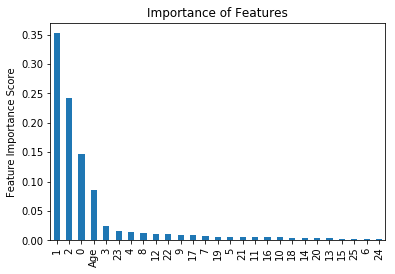

In [44]:
predictors=list(X_train)
feat_imp = pd.Series(random_model.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(random_model.score(X_test, y_test)))
pred=random_model.predict(X_test)
#print(classification_report(y_test, pred))

In [45]:
print(y_test.value_counts())

0    39
1    22
4    14
2    10
3     9
5     5
Name: target, dtype: int64


In [46]:
print('Notes:  We can conclude that Age, dislike count, like count, comment count in this order are the most important features. ')



Notes:  We can conclude that Age, dislike count, like count, comment count in this order are the most important features. 
